In [1]:
# Pacotes essenciais
import pandas as pd
import numpy as np
import missingno as msno

# Pacote de plotagem
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Pacotes de pré-processamento
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# APIs para aprendizado de máquina
from mlxtend.frequent_patterns import apriori,association_rules
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

# **Introduction**

O presente projeto tem como objetivo analisar os dados de um supermaket visando identificar os produtos mais comprados e os tipos de clientes mais recorrentes deste supermarket, para que com isto seja possível elaborar novas estratégias de vendas de produtos e o direcionamento de publico-alvo para que o marketing possa focar em suas propagandas.

Para isto será utilizado dois datasets, o Market_Basket_Optimisation e o Supermarket_CustomerMembers.

Portanto, neste projeto temos os seguintes objetivos:
- Identificar os tipos de consumidores;
- Identificar os produtos mais e menos vendidos;
- Identificar pares de produtos mais vendidos;
- Elaborar estratégias para aumentar a venda de produtos;

# **Visualization data**

In [3]:
df_products = pd.read_csv("Market_Basket_Optimisation.csv",header=None)
df_customers = pd.read_csv("Supermarket_CustomerMembers.csv")

In [4]:
df_products.head()

0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  salad  mineral water  salmon   
1             NaN        NaN    NaN    NaN            NaN     NaN   
2             NaN        NaN    NaN    NaN            NaN     NaN   
3             NaN        NaN    NaN    NaN            NaN     NaN   
4             NaN        NaN    NaN    NaN            NaN     NaN   

                  16               17       18         19  
0  antioxydant juice  frozen smoothie  spinach  olive oil  
1                NaN              NaN      NaN        NaN  
2                NaN              NaN      NaN        NaN  
3                NaN              NaN      NaN        NaN  
4                NaN              NaN      NaN        NaN

Nota-se que para o dataset dos produtos ocorre a presença de dados ausentes devido ao formato em que o dataset foi montado, onde a linha representa o conjunto de produtos comprados.

Neste formato quando uma pessoa compra menos produtos que a anterior ela gera colunas vazias, gerando os dados ausentes.

In [5]:
df_customers.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [6]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


No customers dataset não existe a presença de dados ausentes, porém existe uma quantidade menor de dados para serem analisados.

# **Exploratory Data Analysis (EDA)**

inicialmente será explorado os dados referente ao customers dataset visando características importantes e insights relevantes para a formação de grupos e após isto o products dataset tendo o objetivo de identificar os produtos mais vendidos e suas características relevantes.

<h2> Customers dataset <h2>

<AxesSubplot:xlabel='Genre', ylabel='count'>

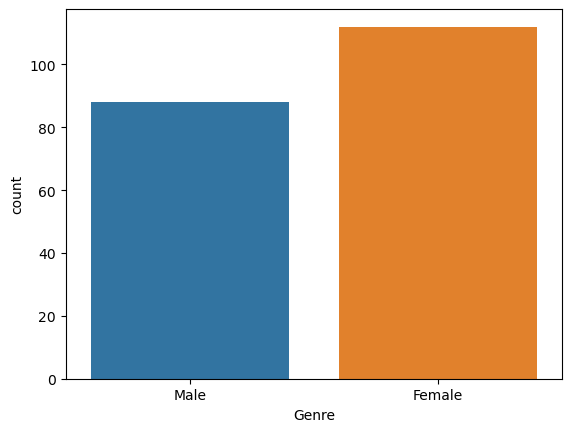

In [7]:
sns.countplot(data = df_customers, x = 'Genre')

Pelo gráfico vemos que a maior parcela dos dados dos consumidores desse supermercado é do sexo feminino.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



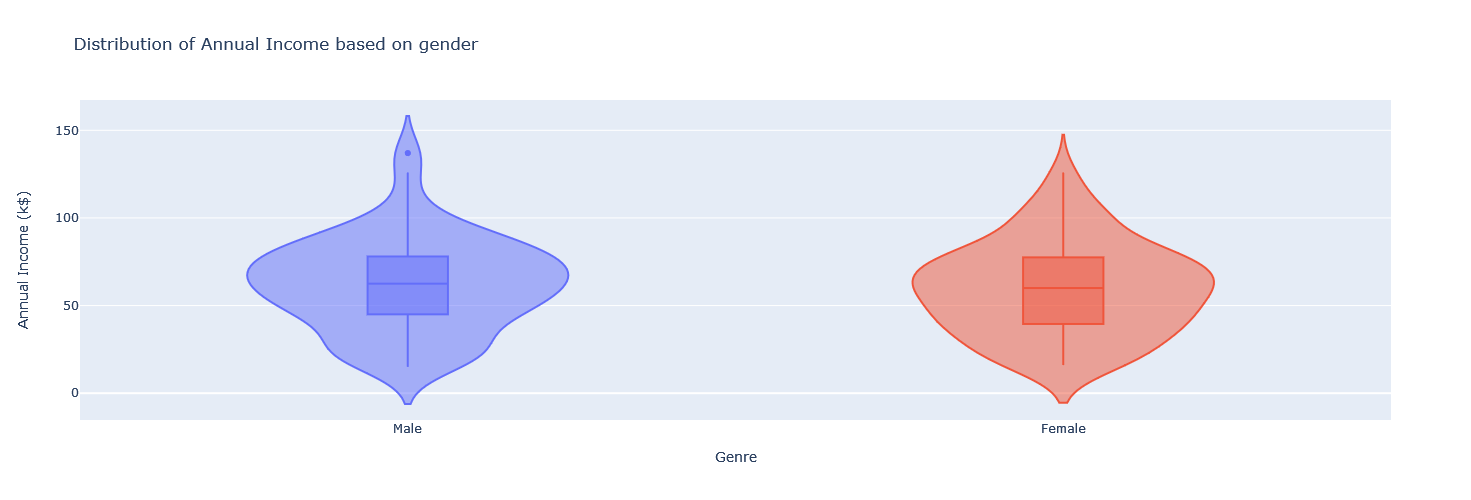

In [8]:
fig = px.violin(df_customers, y="Annual Income (k$)", x = 'Genre', box=True, 
                width = 700, height = 500, color = "Genre",
                title = 'Distribution of Annual Income based on gender')
fig.update_layout(showlegend=False)
fig.show()

Observando o gráfico nota-se que não existem valores muitos discrepantes de annual income neste dataset. Observando os valores de annual income por gênero nota-se que a média do homem (62,600) é um pouco superior do que a média feminina (6,000).O primeiro quartil para os homens (45,000) é maior que o das mulheres (39,500) indicando que a renda dos homens é um pouco mais concentrada e maior que a das mulheres.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



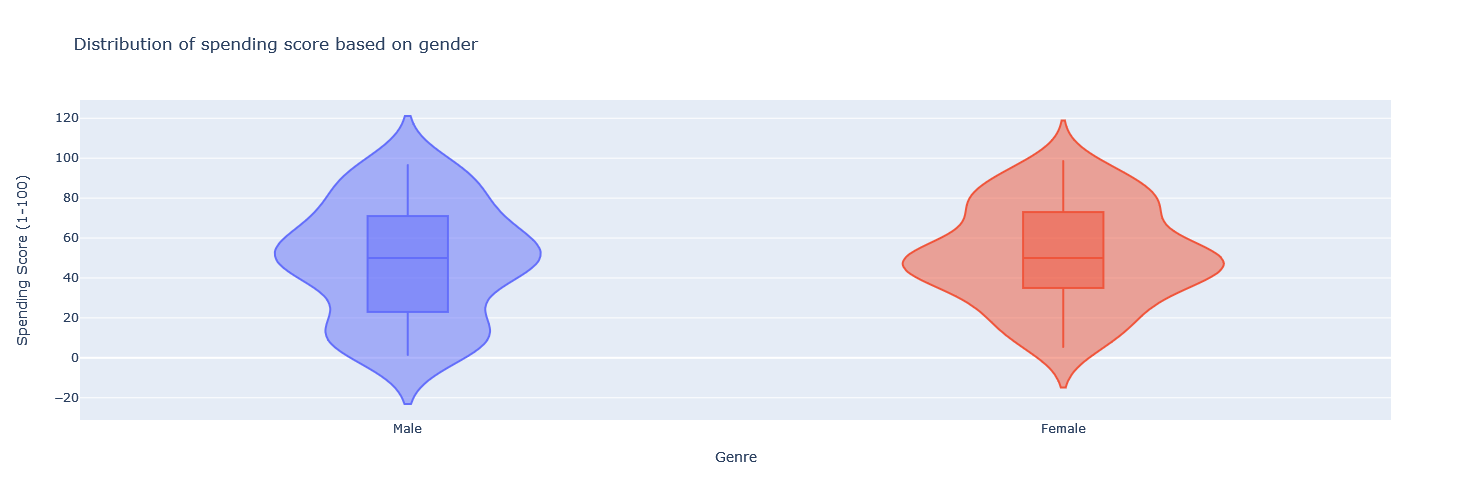

In [9]:
fig = px.violin(df_customers, y="Spending Score (1-100)", x = 'Genre', box=True, 
                width = 700, height = 500, color = "Genre",
                title = 'Distribution of spending score based on gender')
fig.update_layout(showlegend=False)
fig.show()

Analisando o gráfico nota-se que a média do spending score é a mesma para os dois sexos, porém para o genero feminino o range entre o primeiro e terceiro quartil é menor que o do genero masculino, indicando que os dados estão mais concentrados. Como o primeiro quartil feminino (35) é maior que o masculino (23) temos a idéia que as mulheres são mais propensas a comprar mais neste supermercado.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



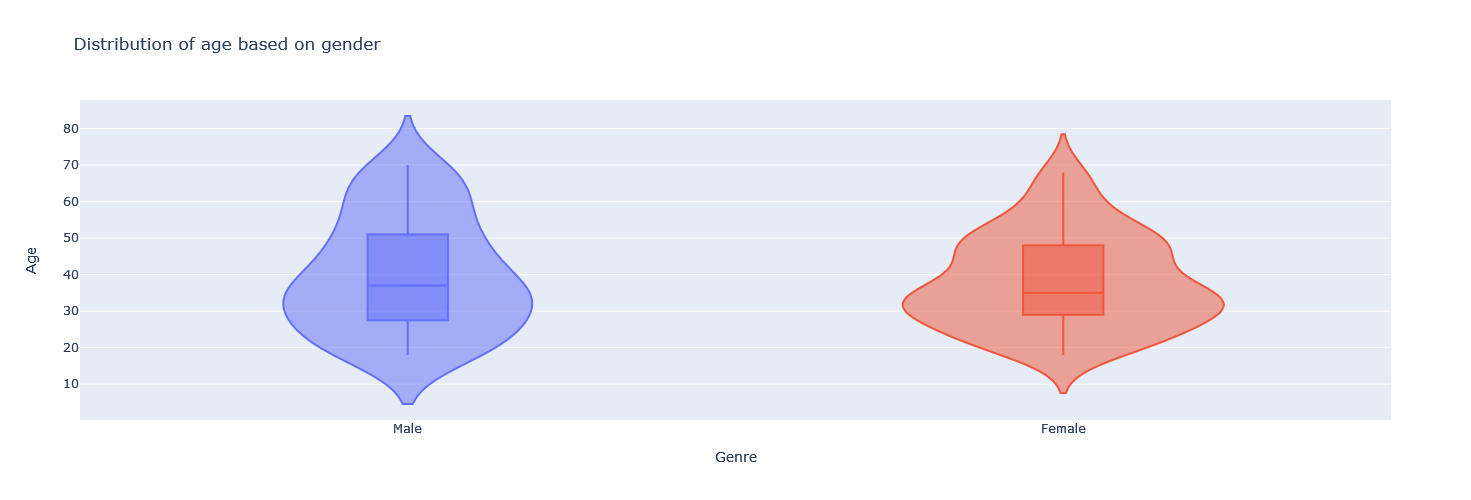

In [10]:
fig = px.violin(df_customers, y="Age", x = 'Genre', box=True, 
                width = 700, height = 500, color = "Genre",
                title = 'Distribution of age based on gender')
fig.update_layout(showlegend=False)
fig.show()

Analisando o gráfico percebe-se que a média das idades das mulheres (35) é menor do que a dos homens (37), além de ter um intervalo de idades mais concentrados (29-48) para as mulheres do que para os homens (27.5-51).

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



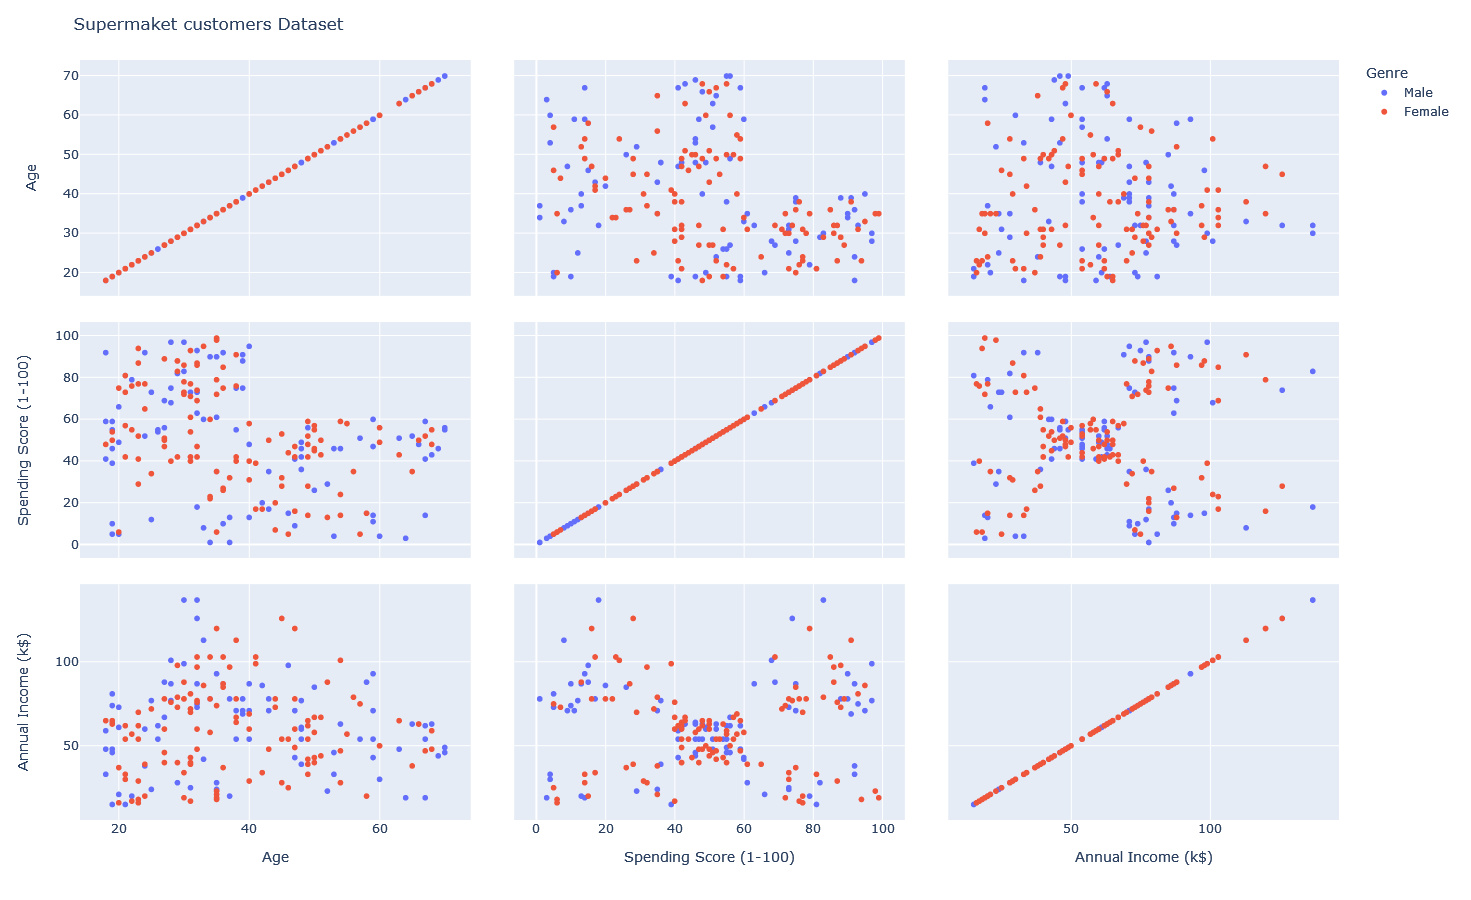

In [11]:
fig = px.scatter_matrix(df_customers,dimensions=["Age","Spending Score (1-100)","Annual Income (k$)"], color = "Genre")
#fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='Supermaket customers Dataset',
    dragmode='select',
    width=900,
    height=900,
    hovermode='closest',
)
fig.show()

Com base nesses gráficos temos as seguintes considerações:
- No gráfico 'Age' x 'Spending Score' nota-se que idades maiores que 40 anos o spending score tende a estar entre o valor de 5 e 60, enquanto para idades menores que 40 anos o spending score oscila entre 20 a 100.
- No gráfico 'Age' x 'Annual Income' os maiores valores de income são encontrados na faixa de indade entre 28 à 54 anos. Para idades abaixo de 28 e acima de 54 o valor de income geralmente encontrado é abaixo de 88,000.
- No gráfico de 'Spending Score' x 'Annual Income' nota-se a formação de 5 grupos diferentes: 
    - Um grupo onde possui um valor alto de income (70,000 à 137,000) mas com spending score baixo, entre 1 à 40.
    - Um grupo onde possui um valor alto de income (70,000 à 137,000) e com spending score alto, entre 63 à 97.
    - Um grupo onde possui um valor baixo de income (16,000 à 38,000) e com spending score alto, entre 60 à 98.
    - Um grupo onde possui um valor baixo de income (16,000 à 38,000) e com spending score baixo, entre 3 à 40.
    - Um grupo com valores medianos de income (40,000 à 65,000) e de spending score (40 à 60).
    
    
Com base nestas informações a expectativa é que ocorra a geração de aproximadamente de 4 a 6 grupos de consumidores baseado nestes dados tendo como features principais o spending score e o annual income.

<h2> Product dataset <h2>

Inicialmente é necessário realizar um feature engineering no dataset a fim retirar informações relevantes dele.

In [12]:
products = df_products.values.tolist()
name_col =['ID_client','item_description']
df_prod = pd.DataFrame(columns=name_col)
for i in range(len(products)):
    buy_list = set(products[i])
    for j in buy_list:
        n = len(df_prod.index)
        df_prod.loc[n,'ID_client'] = i
        df_prod.loc[n,'item_description'] = j

df_prod.dropna(inplace = True)

In [13]:
list_products = set()
for i in range(len(products)):
    list_products = set(products[i]) | list_products
    
list_products = list(list_products)
list_products.pop(0)
list_products.append('Count_products')
aa =np.zeros((len(products),len(list_products)))
df_prod2 = pd.DataFrame(aa, columns = list_products)

for i in range(len(products)-1):
    buy_list = set(products[i])
    for j in range(len(list_products)-1):
        for k in buy_list:
            if list_products[j] == k:
                df_prod2.iloc[i,j] = 1 + df_prod2.iloc[i,j]

    df_prod2.iloc[i,len(list_products)-1] = df_prod2.iloc[i,0:len(list_products)-2].sum()
    
pd.set_option('display.max_columns', None)
df_prod2.describe()

strawberries   body spray  nonfat milk  herb & pepper  fresh bread  \
count   7501.000000  7501.000000  7501.000000    7501.000000  7501.000000   
mean       0.021330     0.011465     0.010399       0.049460     0.043061   
std        0.144493     0.106467     0.101449       0.216841     0.203008   
min        0.000000     0.000000     0.000000       0.000000     0.000000   
25%        0.000000     0.000000     0.000000       0.000000     0.000000   
50%        0.000000     0.000000     0.000000       0.000000     0.000000   
75%        0.000000     0.000000     0.000000       0.000000     0.000000   
max        1.000000     1.000000     1.000000       1.000000     1.000000   

       mineral water  energy drink      shallot     escalope        salad  \
count    7501.000000   7501.000000  7501.000000  7501.000000  7501.000000   
mean        0.238368      0.026663     0.007732     0.079323     0.004933   
std         0.426114      0.161108     0.087599     0.270260     0.070064   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%         0.000000      0.000000     0.000000     0.000000     0.000000   
50%         0.000000      0.000000     0.000000     0.000000     0.000000   
75%         0.000000      0.000000     0.000000     0.000000     0.000000   
max         1.000000      1.000000     1.000000     1.000000     1.000000   

          brownies  barbecue sauce    olive oil  burger sauce  \
count  7501.000000     7501.000000  7501.000000   7501.000000   
mean      0.033729        0.010799     0.065858      0.005866   
std       0.180542        0.103360     0.248050      0.076369   
min       0.000000        0.000000     0.000000      0.000000   
25%       0.000000        0.000000     0.000000      0.000000   
50%       0.000000        0.000000     0.000000      0.000000   
75%       0.000000        0.000000     0.000000      0.000000   
max       1.000000        1.000000     1.000000      1.000000   

       parmesan cheese      carrots      almonds  french wine        cider  \
count      7501.000000  7501.000000  7501.000000   7501.00000  7501.000000   
mean          0.019864     0.015331     0.020397      0.02253     0.010532   
std           0.139542     0.122875     0.141364      0.14841     0.102090   
min           0.000000     0.000000     0.000000      0.00000     0.000000   
25%           0.000000     0.000000     0.000000      0.00000     0.000000   
50%           0.000000     0.000000     0.000000      0.00000     0.000000   
75%           0.000000     0.000000     0.000000      0.00000     0.000000   
max           1.000000     1.000000     1.000000      1.00000     1.000000   

            pepper      shampoo  cottage cheese  light cream   fresh tuna  \
count  7501.000000  7501.000000     7501.000000  7501.000000  7501.000000   
mean      0.026530     0.004933        0.031862     0.015598     0.022264   
std       0.160715     0.070064        0.175645     0.123922     0.147550   
min       0.000000     0.000000        0.000000     0.000000     0.000000   
25%       0.000000     0.000000        0.000000     0.000000     0.000000   
50%       0.000000     0.000000        0.000000     0.000000     0.000000   
75%       0.000000     0.000000        0.000000     0.000000     0.000000   
max       1.000000     1.000000        1.000000     1.000000     1.000000   

       frozen vegetables  chocolate bread    black tea    chocolate  \
count        7501.000000      7501.000000  7501.000000  7501.000000   
mean            0.095321         0.004266     0.014265     0.163845   
std             0.293677         0.065180     0.118588     0.370159   
min             0.000000         0.000000     0.000000     0.000000   
25%             0.000000         0.000000     0.000000     0.000000   
50%             0.000000         0.000000     0.000000     0.000000   
75%             0.000000         0.000000     0.000000     0.000000   
max             1.000000         1.000000     1.000000     1.000000 

Analisando a tabela temos que:
- Não existe a repetição de um mesmo item em uma unica compra.
- Em média um consumidor compra 4 produtos.
- O maior número de produtos comprados em uma única vez foi 20.

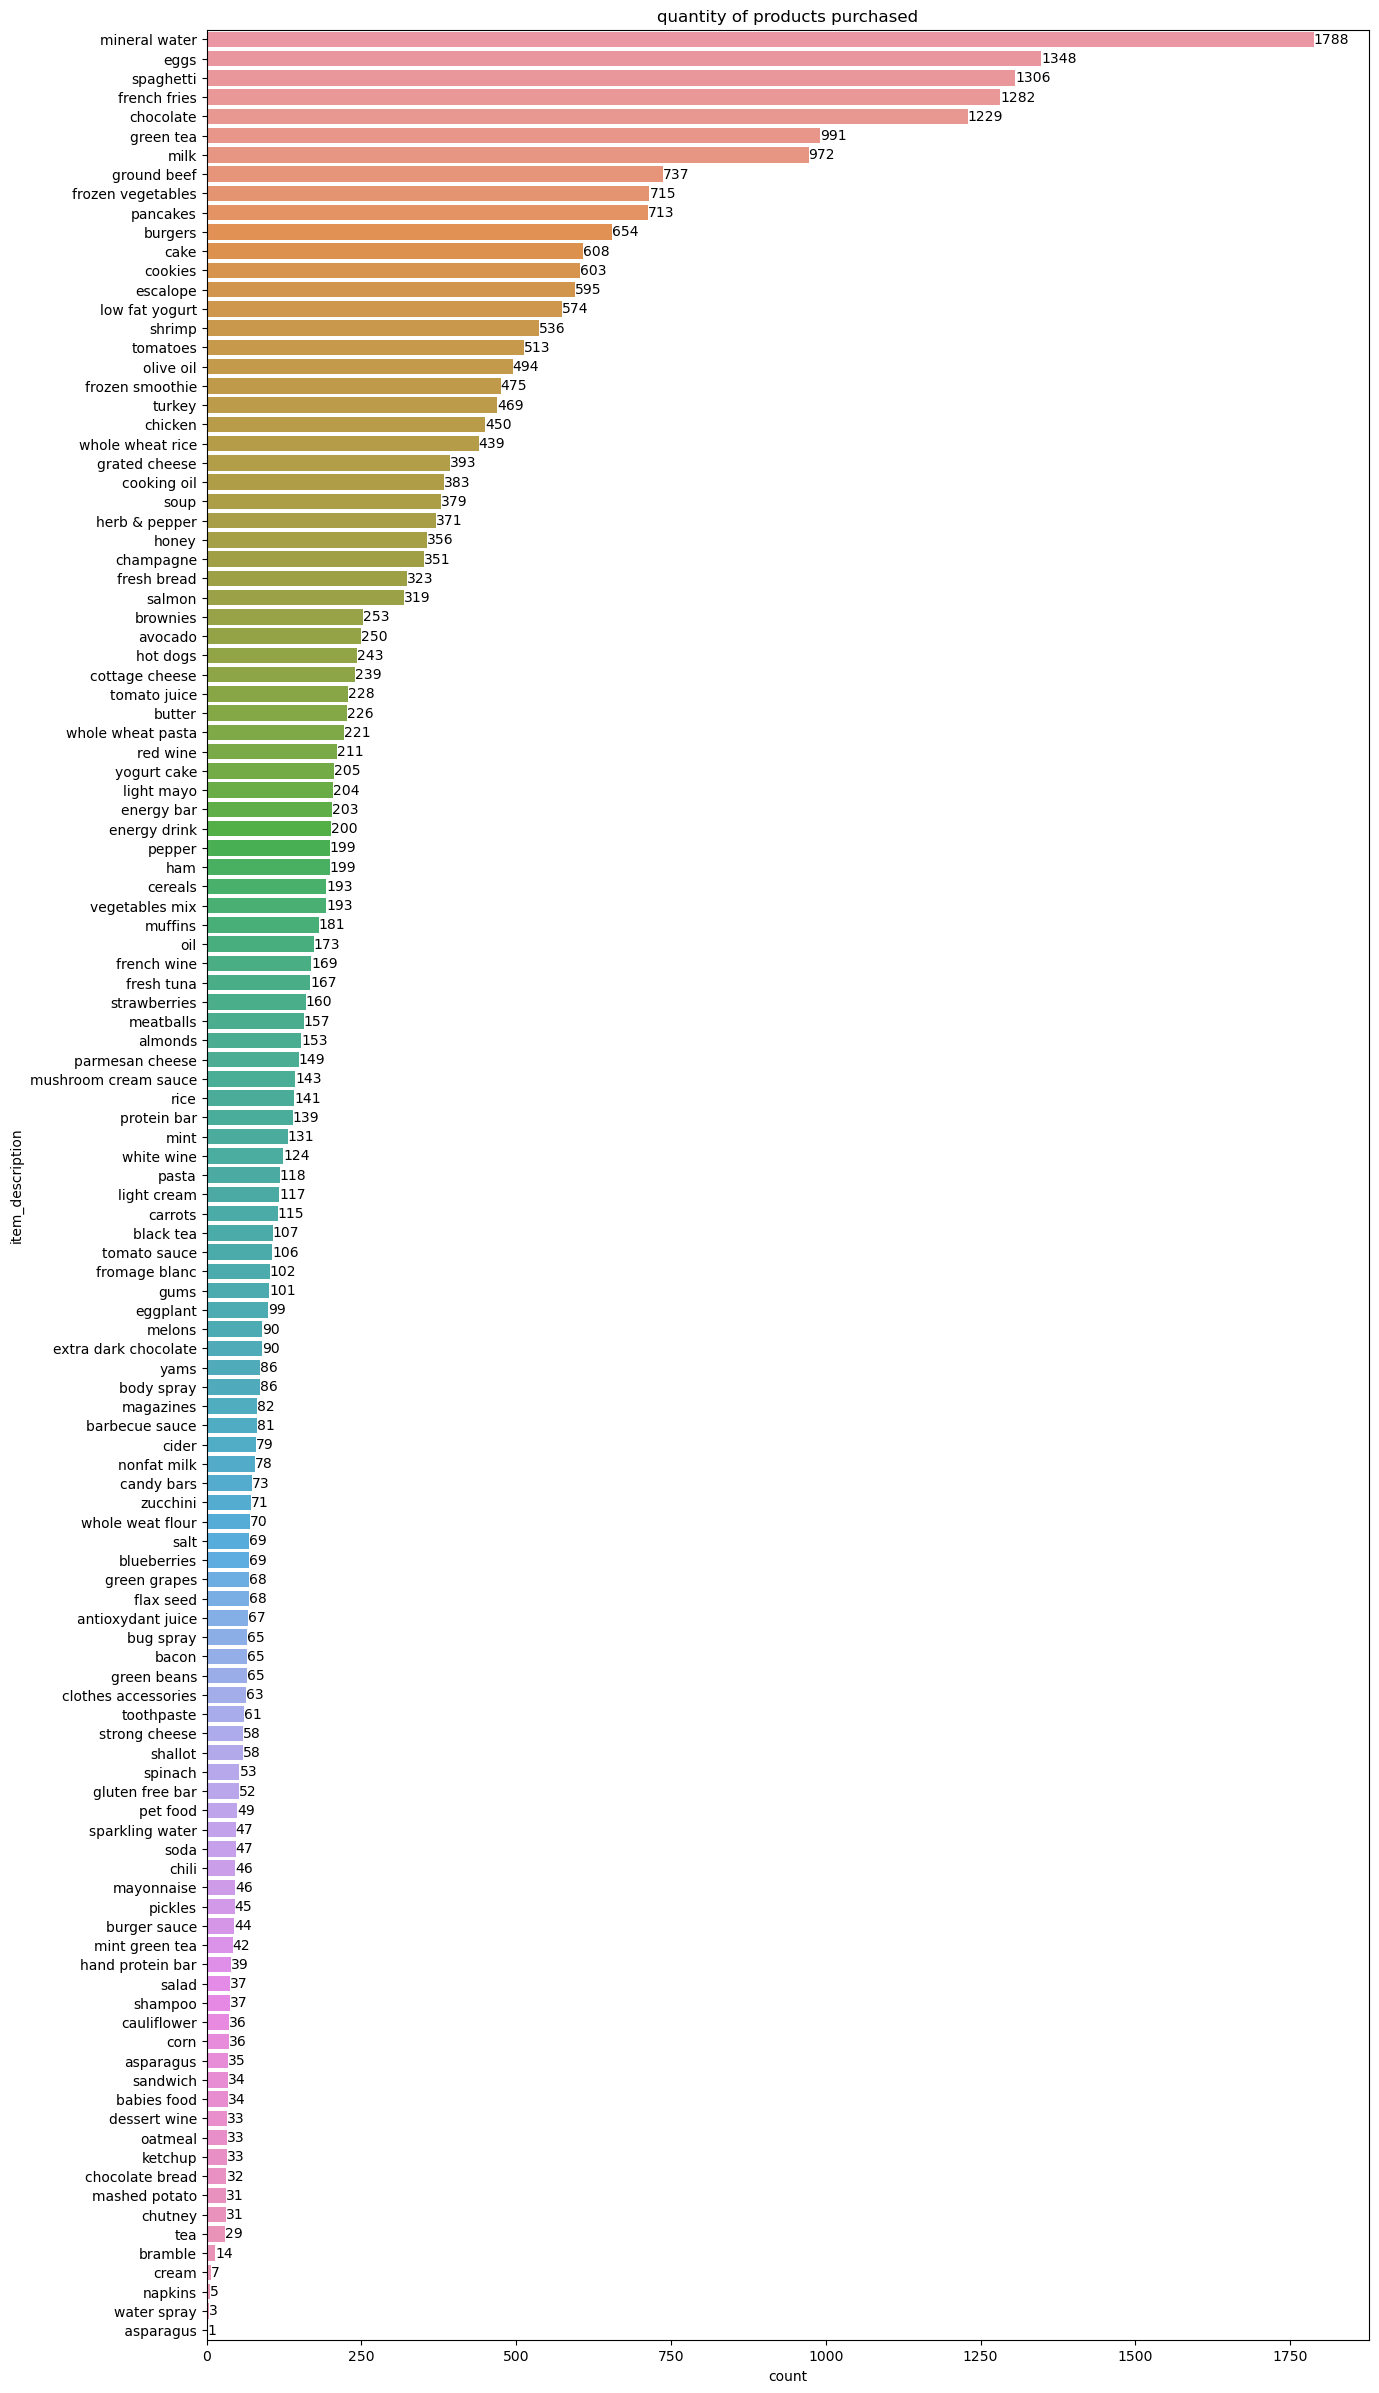

In [14]:
plt.figure(figsize=(15,30))
ax = sns.countplot(data= df_prod, y= 'item_description',order = df_prod['item_description'].value_counts().index)
ax.bar_label(ax.containers[0])
ax.set_title("quantity of products purchased")
plt.show()

Com base no gráfico os top 10 itens mais comprados são:
- mineral water, eggs, spaghetti, french fries, chocolate, green tea, milk, ground beef, frozen vegetagles, pancakes.

Destes itens, a sua maioria é composta por itens de consumo diário e por itens de breakfast.

Os top 10 itens menos comprados são:
- asparagus, water spray, napkins, cream, bramble, tea, mashed potato, chutney, chocolate bread,dessert wine.

Alguns destes itens são considerados itens de limpeza, de sobremesa e vegetais, porém não parece existir um padrão vísivel entre eles para que ocorre-se a sua baixa demanda.

Para identificar os pares de produtos mais comprados será utilizado as regras de associação.

# **Association rules - products purchased**

<h2> Main concepts <h2>

To understand association rules, it is necessary to understand four fundamental concepts:

- Support: Support is an indication of how frequently the itemset appears in the dataset. In other words, this is an indication of how popular an itemset is in a dataset.

- Confidence:  Confidence is an indication of how often the rule has been found to be true. In other words, confidence says how likely item Y is purchased when item X is purchased.

- Lift: Lift is a metric to measure the ratio of X and Y occur together to X and Y occurrence if they were statistically independent. In other words, lift illustrates how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is.

   - A Lift score that is close to 1 indicates that the antecedent and the consequent are independent and occurrence of antecedent has no impact on occurrence of consequent.

   - A Lift score that is bigger than 1 indicates that the antecedent and consequent are dependent to each other, and the occurrence of antecedent has a positive impact on occurrence of consequent.

   - A Lift score that is smaller than 1 indicates that the antecedent and the consequent are substitute each other that means the existence of antecedent has a negative impact to consequent or visa versa.

-  Conviction: Conviction measures the implication strength of the rule from statistical independence Conviction score is a ratio between the probability that X occurs without Y while they were dependent and the actual probability of X existence without Y. 


In [15]:
df_prod2.drop(columns = ['Count_products'],inplace = True)
freq_item = apriori(df_prod2, min_support=0.01, use_colnames=True)
freq_item['length'] = freq_item['itemsets'].apply(lambda x: len(x))
freq_item

C:\Users\Pichau\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



support                                 itemsets  length
0    0.021330                           (strawberries)       1
1    0.011465                             (body spray)       1
2    0.010399                            (nonfat milk)       1
3    0.049460                          (herb & pepper)       1
4    0.043061                            (fresh bread)       1
..        ...                                      ...     ...
252  0.010132       (eggs, mineral water, ground beef)       3
253  0.011465     (mineral water, pancakes, spaghetti)       3
254  0.017064  (ground beef, mineral water, spaghetti)       3
255  0.010932             (milk, chocolate, spaghetti)       3
256  0.010532             (eggs, chocolate, spaghetti)       3

[257 rows x 3 columns]

Com base no valor mínimo de suporte escolhido de 1% temos que no máximo ocorre a formação de um grupo composto por 3 itens.

In [16]:
freq_item[ (freq_item['length'] == 2) & (freq_item['support'] >= 0.04) ]

support                      itemsets  length
83   0.052660    (mineral water, chocolate)       2
92   0.047994         (milk, mineral water)       2
99   0.050927         (eggs, mineral water)       2
101  0.059725    (mineral water, spaghetti)       2
107  0.040928  (mineral water, ground beef)       2

Observando os pares de itens gerados com um valor de support maior que 4% tem-se que em todos os casos existe a presença do item 'mineral water'.

Também é perceptível que todos estes pares são gerados com os top 10 itens comprados neste supermarket.

In [17]:
freq_item[ (freq_item['length'] == 3) ]

support                                       itemsets  length
240  0.010265          (spaghetti, mineral water, olive oil)       3
241  0.011065       (frozen vegetables, mineral water, milk)       3
242  0.011998  (frozen vegetables, mineral water, spaghetti)       3
243  0.013998               (milk, mineral water, chocolate)       3
244  0.013465               (eggs, mineral water, chocolate)       3
245  0.015865          (mineral water, chocolate, spaghetti)       3
246  0.010932        (mineral water, chocolate, ground beef)       3
247  0.013065                    (milk, eggs, mineral water)       3
248  0.015731               (milk, mineral water, spaghetti)       3
249  0.011065             (milk, mineral water, ground beef)       3
250  0.010132       (french fries, mineral water, spaghetti)       3
251  0.014265               (eggs, mineral water, spaghetti)       3
252  0.010132             (eggs, mineral water, ground beef)       3
253  0.011465           (mineral water, pancakes, spaghetti)       3
254  0.017064        (ground beef, mineral water, spaghetti)       3
255  0.010932                   (milk, chocolate, spaghetti)       3
256  0.010532                   (eggs, chocolate, spaghetti)       3

Observando a tabela gerada, nota-se novamente a presença do item 'mineral water' em quase todos os grupos formados.

In [18]:
rules = association_rules(freq_item, metric="lift", min_threshold=1.3)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("confidence",ascending=False).head(10)

antecedents      consequents  antecedent support  \
277        (eggs, ground beef)  (mineral water)            0.019997   
261        (milk, ground beef)  (mineral water)            0.021997   
244   (chocolate, ground beef)  (mineral water)            0.023064   
213  (frozen vegetables, milk)  (mineral water)            0.023597   
26                      (soup)  (mineral water)            0.050527   
284      (pancakes, spaghetti)  (mineral water)            0.025197   
207     (olive oil, spaghetti)  (mineral water)            0.022930   
255          (milk, spaghetti)  (mineral water)            0.035462   
225          (milk, chocolate)  (mineral water)            0.032129   
289   (spaghetti, ground beef)  (mineral water)            0.039195   

     consequent support   support  confidence      lift  leverage  conviction  \
277            0.238368  0.010132    0.506667  2.125563  0.005365    1.543848   
261            0.238368  0.011065    0.503030  2.110308  0.005822    1.532552   
244            0.238368  0.010932    0.473988  1.988472  0.005434    1.447937   
213            0.238368  0.011065    0.468927  1.967236  0.005440    1.434136   
26             0.238368  0.023064    0.456464  1.914955  0.011020    1.401255   
284            0.238368  0.011465    0.455026  1.908923  0.005459    1.397557   
207            0.238368  0.010265    0.447674  1.878079  0.004799    1.378954   
255            0.238368  0.015731    0.443609  1.861024  0.007278    1.368879   
225            0.238368  0.013998    0.435685  1.827780  0.006340    1.349656   
289            0.238368  0.017064    0.435374  1.826477  0.007722    1.348914   

     antecedents_length  consequents_length  
277                   2                   1  
261                   2                   1  
244                   2                   1  
213                   2                   1  
26                    1                   1  
284                   2                   1  
207                   2                   1  
255                   2                   1  
225                   2                   1  
289                   2                   1

Observando a tabela é possível perceber existe uma grande tendência do item 'mineral water' ser o terceiro item a ser comprado.

Pela tabela vemos uma grande presença dos itens 'ground beef', 'spaghetti' e 'milk' como antecedentes que possuem maior valor de confidence, porém em sua maior parte são comprados em pares para depois resultar na compra de 'mineral water'. Em geral todos esses casos estas hipóteses possuem valores de lift e conviction altos, reforçando a confiabilidade desta regra.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



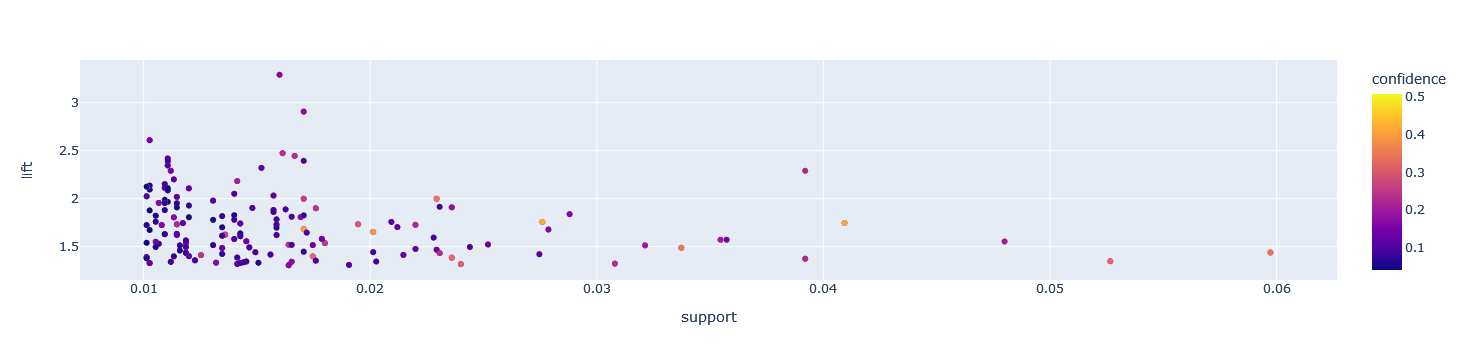

In [42]:
px.scatter(rules, x ='support', y =  'lift', color = 'confidence')

Observando o gráfico temos que a maioria das regras criadas possui lift maior que 1 e valor de confiança menor que 50%. Isto nos dá a idéia de que as regras criadas possuem bastante força mas que algumas não tem uma ocorrência forte nas listas de compras examinadas.

In [19]:
rules[ (rules['antecedents_length'] == 1) ].sort_values("confidence",ascending=False).head(10)

antecedents      consequents  antecedent support  \
26                (soup)  (mineral water)            0.050527   
9            (olive oil)  (mineral water)            0.065858   
51         (ground beef)  (mineral water)            0.098254   
49              (salmon)  (mineral water)            0.042528   
36             (cereals)  (mineral water)            0.025730   
198        (ground beef)      (spaghetti)            0.098254   
43         (cooking oil)  (mineral water)            0.051060   
20            (red wine)  (mineral water)            0.028130   
34             (chicken)  (mineral water)            0.059992   
10   (frozen vegetables)  (mineral water)            0.095321   

     consequent support   support  confidence      lift  leverage  conviction  \
26             0.238368  0.023064    0.456464  1.914955  0.011020    1.401255   
9              0.238368  0.027596    0.419028  1.757904  0.011898    1.310962   
51             0.238368  0.040928    0.416554  1.747522  0.017507    1.305401   
49             0.238368  0.017064    0.401254  1.683336  0.006927    1.272045   
36             0.238368  0.010265    0.398964  1.673729  0.004132    1.267198   
198            0.174110  0.039195    0.398915  2.291162  0.022088    1.373997   
43             0.238368  0.020131    0.394256  1.653978  0.007960    1.257349   
20             0.238368  0.010932    0.388626  1.630358  0.004227    1.245770   
34             0.238368  0.022797    0.380000  1.594172  0.008497    1.228438   
10             0.238368  0.035729    0.374825  1.572463  0.013007    1.218270   

     antecedents_length  consequents_length  
26                    1                   1  
9                     1                   1  
51                    1                   1  
49                    1                   1  
36                    1                   1  
198                   1                   1  
43                    1                   1  
20                    1                   1  
34                    1                   1  
10                    1                   1

Olhando a tabela que leva em consideração a compra de somente 1 item como antecessor, percebe-se a forte presença do item 'mineral water' novamente.

Um outro produto que foge um pouco desta regra é o item 'ground beef' com o 'spaghetti' possuindo um valor de confidence de cerca de 40% juntamente com um lift muito elevado de 2.3.

In [20]:
rules[ (rules['antecedents_length'] == 1) & (rules['consequents_length'] == 1) ].sort_values("confidence",ascending=True).head(10)

antecedents      consequents  antecedent support  consequent support  \
37   (mineral water)        (cereals)            0.238368            0.025730   
21   (mineral water)       (red wine)            0.238368            0.028130   
15   (mineral water)        (avocado)            0.238368            0.033329   
131      (spaghetti)       (red wine)            0.174110            0.028130   
33   (mineral water)          (honey)            0.238368            0.047460   
99       (chocolate)         (salmon)            0.163845            0.042528   
173      (spaghetti)          (honey)            0.174110            0.047460   
2             (eggs)  (herb & pepper)            0.179576            0.049460   
87       (chocolate)      (champagne)            0.163845            0.046794   
48   (mineral water)         (salmon)            0.238368            0.042528   

      support  confidence      lift  leverage  conviction  antecedents_length  \
37   0.010265    0.043065  1.673729  0.004132    1.018115                   1   
21   0.010932    0.045861  1.630358  0.004227    1.018584                   1   
15   0.011598    0.048658  1.459926  0.003654    1.016113                   1   
131  0.010265    0.058959  2.095966  0.005368    1.032761                   1   
33   0.015065    0.063199  1.331619  0.003752    1.016801                   1   
99   0.010665    0.065094  1.530617  0.003697    1.024137                   1   
173  0.011865    0.068147  1.435873  0.003602    1.022200                   1   
2    0.012532    0.069785  1.410930  0.003650    1.021849                   1   
87   0.011598    0.070789  1.512793  0.003932    1.025824                   1   
48   0.017064    0.071588  1.683336  0.006927    1.031302                   1   

     consequents_length  
37                    1  
21                    1  
15                    1  
131                   1  
33                    1  
99                    1  
173                   1  
2                     1  
87                    1  
48                    1

Observando as regras que possuem somente um item de antecessor e um item de consequência com o menor valor de confiança tem-se que quando a pessoa compra 'mineral water' ela tem baixa chance de comprar junto itens como 'cereals', 'red wine' e 'avocado'.

Nota-se também que essas regras apresentadas relacionam itens de maior demanda como itens antecessores e itens de média demanda como consequência.

# **Customer segmentation - Clustering**

<h2> Scaling data <h2>

In [22]:
df_customers.drop('CustomerID', axis=1, inplace = True)
label_encoder = LabelEncoder()
data_scaler = df_customers.copy()
data_scaler['Genre'] = label_encoder.fit_transform(df_customers['Genre'])
scaler = MinMaxScaler()
data_scaler = pd.DataFrame(scaler.fit_transform(data_scaler),columns=df_customers.columns)
data_scaler

Genre       Age  Annual Income (k$)  Spending Score (1-100)
0      1.0  0.019231            0.000000                0.387755
1      1.0  0.057692            0.000000                0.816327
2      0.0  0.038462            0.008197                0.051020
3      0.0  0.096154            0.008197                0.775510
4      0.0  0.250000            0.016393                0.397959
..     ...       ...                 ...                     ...
195    0.0  0.326923            0.860656                0.795918
196    0.0  0.519231            0.909836                0.275510
197    1.0  0.269231            0.909836                0.744898
198    1.0  0.269231            1.000000                0.173469
199    1.0  0.230769            1.000000                0.836735

[200 rows x 4 columns]

In [23]:
data_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genre                   200 non-null    float64
 1   Age                     200 non-null    float64
 2   Annual Income (k$)      200 non-null    float64
 3   Spending Score (1-100)  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<h2> K-means model <h2>

Para a implementação do modelo k-means inicialmente deve ser selecionado a quantidade de grupos a serem gerados. Para isto será utilizado quatro critérios diferentes para identificar a quantidade de clusters que devem ser gerados. Os critérios em questão são:
- The Elbow method, based in inertia.
- Silhouette criterion.
- Calinski and Harabasz criterion.
- Davies and Bouldin criterion.

Uma simples explicação dos ultimos três critérios pode ser encontrada no seguinte link: [How to measure clustering performances](https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c).

In [26]:
# Avaliando o número de clusters utilizados no K-means
wcss = []
sil = []
CeH = []
DeB = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(data_scaler)
    # Calculando as métricas
    aux1 = silhouette_score(data_scaler, kmeans.labels_)
    aux2 = calinski_harabasz_score(data_scaler, kmeans.labels_)
    aux3 = davies_bouldin_score(data_scaler, kmeans.labels_)
    # Armazenando os valores das métricas calculadas
    wcss.append(kmeans.inertia_)
    sil.append(aux1)
    CeH.append(aux2)
    DeB.append(aux3)

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



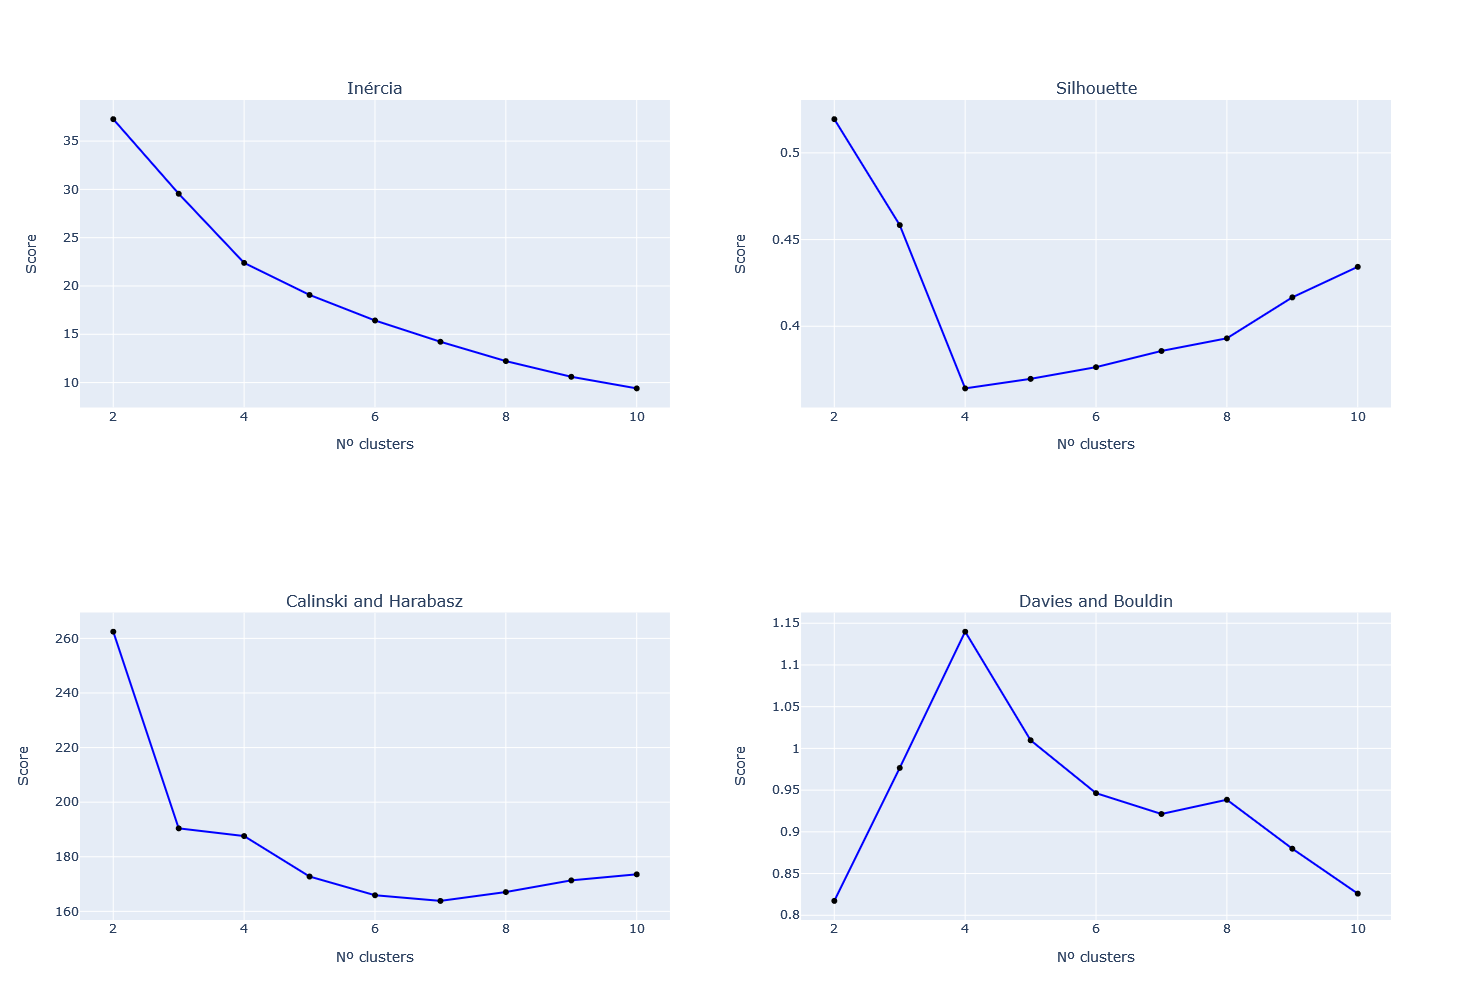

In [27]:
# Criando os gráficos das métricas

figu = make_subplots(rows = 2, cols = 2,subplot_titles=("Inércia", "Silhouette", "Calinski and Harabasz", "Davies and Bouldin"))
# Add traces
X = np.arange(2,21)
figu.add_trace(
    go.Scatter(x = X, y = wcss,mode='lines+markers',line={'color' : 'blue'}, marker = {'color' : 'black'}),
    row=1,col=1)
figu.add_trace(
    go.Scatter(x = X, y = sil,mode='lines+markers',line={'color' : 'blue'}, marker = {'color' : 'black'}),
    row=1,col=2)
figu.add_trace(
    go.Scatter(x = X, y = CeH,mode='lines+markers',line={'color' : 'blue'}, marker = {'color' : 'black'}),
    row=2,col=1)
figu.add_trace(
    go.Scatter(x = X, y = DeB,mode='lines+markers',line={'color' : 'blue'}, marker = {'color' : 'black'}),
    row=2,col=2)

# Update xaxis properties
figu.update_xaxes(title_text="Nº clusters", row=1, col=1)
figu.update_xaxes(title_text="Nº clusters", row=1, col=2)
figu.update_xaxes(title_text="Nº clusters", row=2, col=1)
figu.update_xaxes(title_text="Nº clusters", row=2, col=2)

# Update yaxis properties
figu.update_yaxes(title_text="Score", row=1, col=1)
figu.update_yaxes(title_text="Score", row=1, col=2)
figu.update_yaxes(title_text="Score", row=2, col=1)
figu.update_yaxes(title_text="Score", row=2, col=2)
figu.update_layout(showlegend=False,height=1000, width=1000)
figu.show()

bservando os gráficos tem-se que:
- Para o critério de inércia ocorre um ponto suave de inflexão com 4 clusters.
- Para o critério de Silhouette  o ponto que apresenta o maior valor de score é o que possui 2 clusters.
- Para o critério de Calinski and Harabasz o gráfico não apresenta um ponto de inflexão positivo, logo não existe um valor de clusters por meio deste critério.
- Pelo critério de Davis and Bouldin o ponto que apresenta menor valor de score é o que possui 2 clusters.

Com estes resultados temos que será gerado uma segmentação com 2 cluster ou com 4 clusters. Na minha opinião dois clusters não seria significativo, visto que o dataset possui poucos dados e poucas features, assim provavelmente ocorreu uma segregação por meio de dois grupos de renda ou spending score.

Portanto será utilizado a clusterização com 4 clusters no decorrer das análises.


<h2> Cluster vizualization - PCA <h2>

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



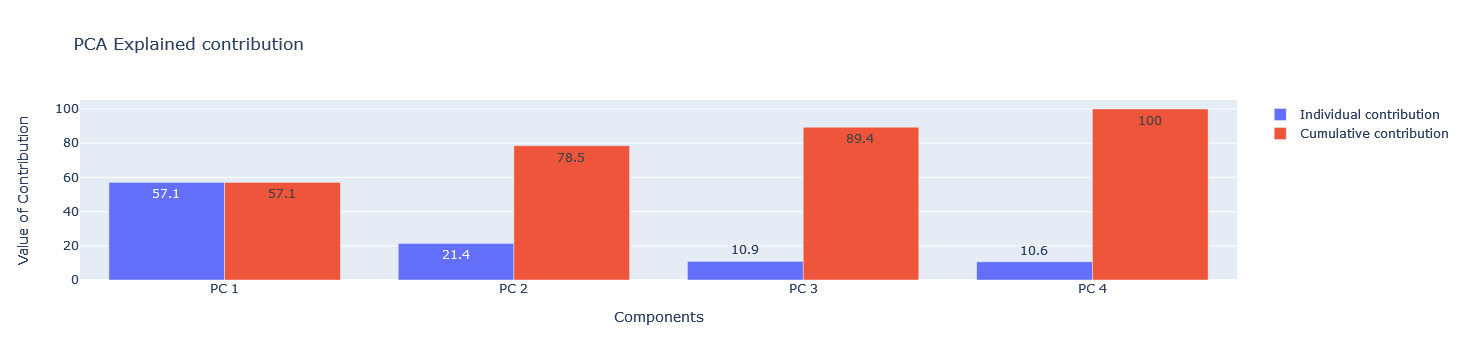

In [28]:
pca = PCA()
pca_components = pca.fit(data_scaler)
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
var_cumulative = np.zeros(len(var))
var_cumulative[0] = var[0]
for i in range(1,len(var)):
    var_cumulative[i] = var[i]+var_cumulative[i-1]

labels = [
    f"PC {i+1}"
    for i in range(0,len(var))
]

fig = go.Figure()
fig.add_trace(go.Bar(
    x = labels,
    y= var,
    text = var,
    name='Individual contribution'))

fig.add_trace(go.Bar(
    x = labels,
    y = var_cumulative,
    text = var_cumulative,
    name ='Cumulative contribution'))

fig.update_layout(barmode='group',
                  title="PCA Explained contribution",
                  xaxis_title="Components",
                  yaxis_title="Value of Contribution")

fig.show()

Observando o gráfico nota-se que a explicabilidade do dados com três componentes é de 89,4% sendo um valor razoável para a vizualização dos dados.

In [30]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(data_scaler)
df_customers['class'] = kmeans.labels_
data_scaler['class'] = df_customers['class']

for i in range(0,max(kmeans.labels_)+1):
    var = 'class '+ str(i+1)
    df_customers['class'] = df_customers['class'].replace(i,var)

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



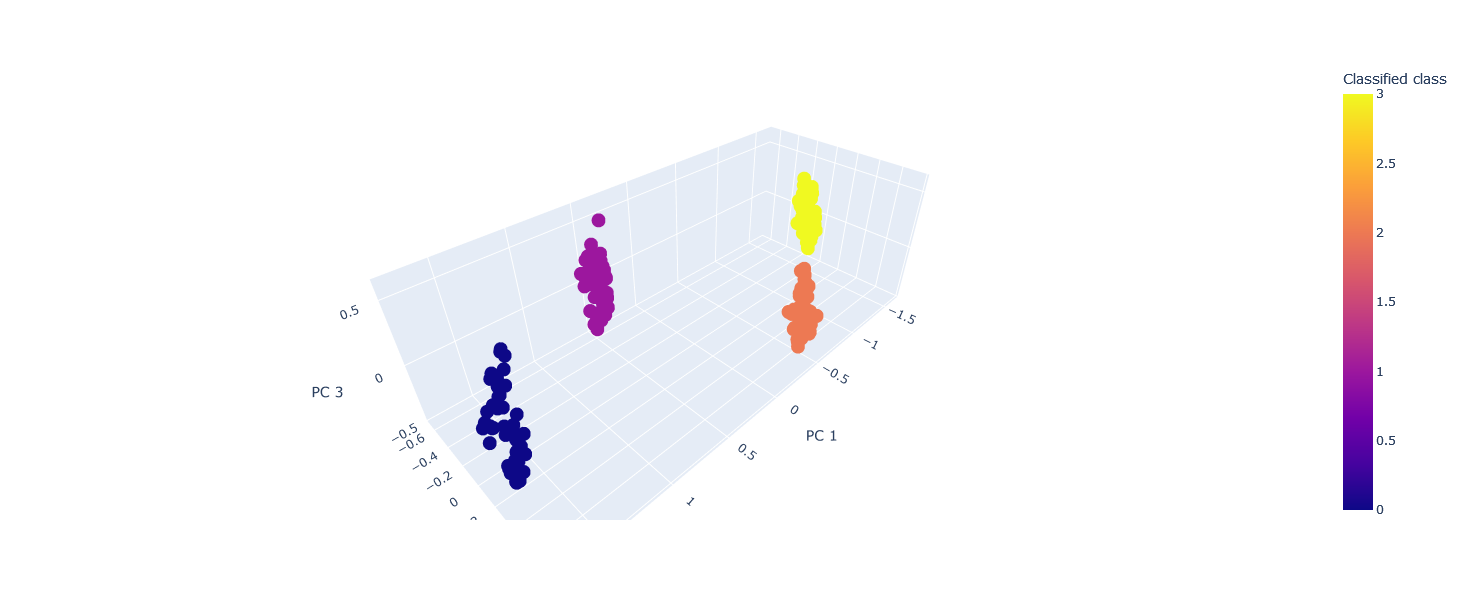

In [31]:
pca = PCA(3)
pca_components=pca.fit(data_scaler)
scores_pca = pca.transform(data_scaler)
pca_data = pd.DataFrame(scores_pca, columns=['PC 1','PC 2','PC 3']) 
pca_data['class'] = data_scaler['class']

fig = px.scatter_3d(pca_data,x = 'PC 1', y = 'PC 2', z = 'PC 3' ,color='class',width=1200,height = 600, labels={"class":"Classified class"})
fig.show()

Analisando o gráfico nota-se que os quatro grupos gerados estão bem isolados, mostrando que a clusterização foi eficiente.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



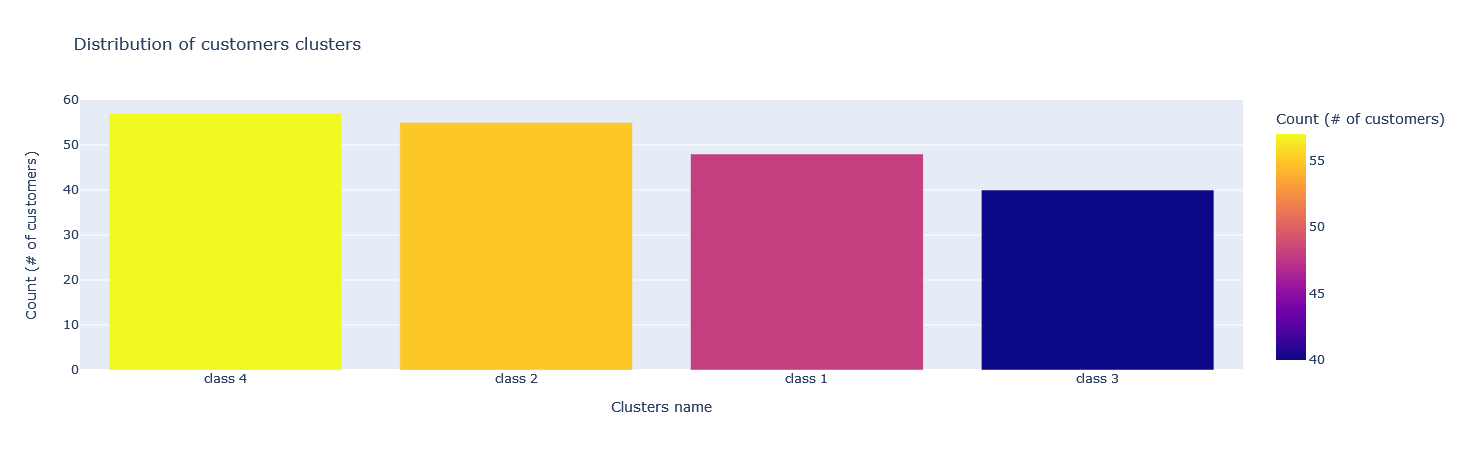

In [32]:
fig = px.bar(df_customers['class'].value_counts(), 
             y = "class", color = 'class',
            width = 600, height = 450,
            labels={"class": "Count (# of customers)",
                     "index": "Clusters name"},
                title="Distribution of customers clusters")
fig.show()

Pelo gráfico nota-se que a estão bens distribuidas, sendo a classe 2 com a maior quantidade de dados (57) e a classe 4 com a menor quantidade de dados (40).

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



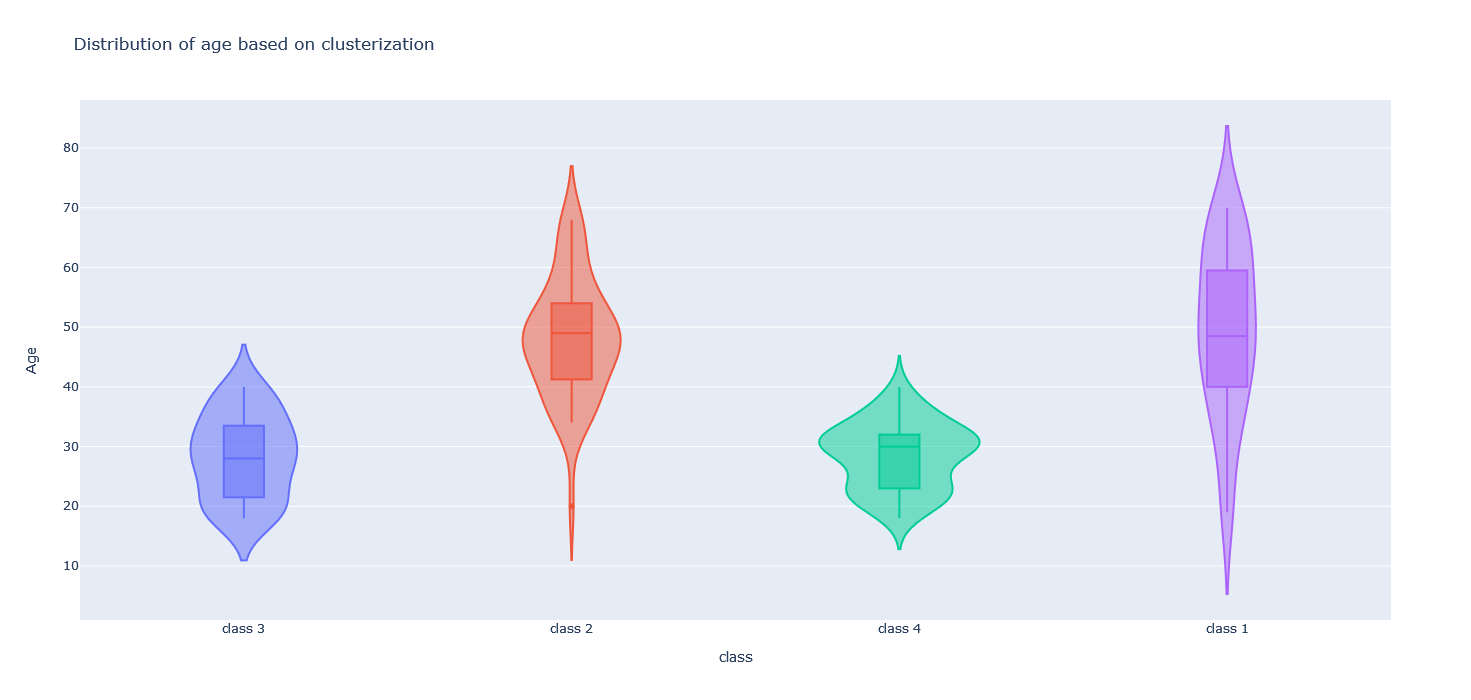

In [33]:
fig = px.violin(df_customers, y="Age", x = 'class', box=True, 
                width = 900, height = 700, color = "class",
                title = 'Distribution of age based on clusterization')
fig.update_layout(showlegend=False)
fig.show()

Analisando o gráfico temos:
- As classes 2 e 4 pertencem à um grupo de pessoas mais jovens, girando em torno de 18 à 40 anos.
- A classe 2 possui uma grande concentração de pessoas na faixa dos 30 anos.
- A classe 3 pertence à um grupo de pessoas adultas e idosos, indo de 34 anos até 68 anos, sendo mais concentrada na faixa de 41 à 54 anos.
- a classe 1 engloba uma faixa alta de idades, indo de 19 anos até 70 anos, onde em média a pessoa possui 49 anos.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



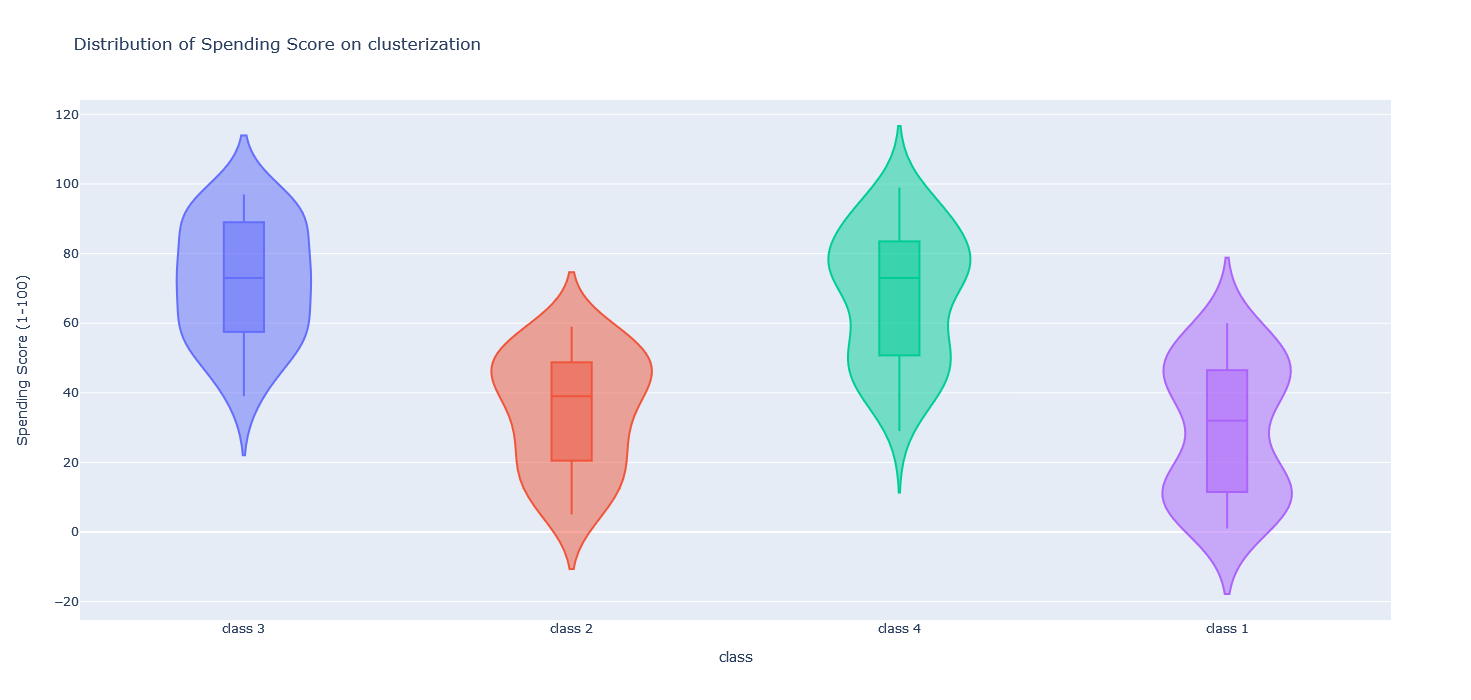

In [34]:
fig = px.violin(df_customers, y="Spending Score (1-100)", x = 'class', box=True, 
                width = 900, height = 700, color = "class",
                title = 'Distribution of Spending Score on clusterization')
fig.update_layout(showlegend=False)
fig.show()

Com base nesse gráfico é possivel concluir:
- A classe 4 representa um grupo que tem a tendência a gastar mais em suas compras, possuindo em sua maioria um spending score entre 58 e 89.
- A classe 3 representa um grupo de pessoas que não tende a gastar muito, variando o spending score de 5 à 60, porém sendo mais concentrado na faixa de 39 a 50.
- A classe 2 também representa um grupo de pessoas que gastam mais, porém neste caso o spending score é mais concentrado entre o valor de 62 e 93.
- A classe 1 representa um grupo de pessoas que em geral não gastam muito, tendo dois intervalos de concentração, um com spending score variando entre 1 e 25 e outro intervalo indo de 32 até 60.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Pichau\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



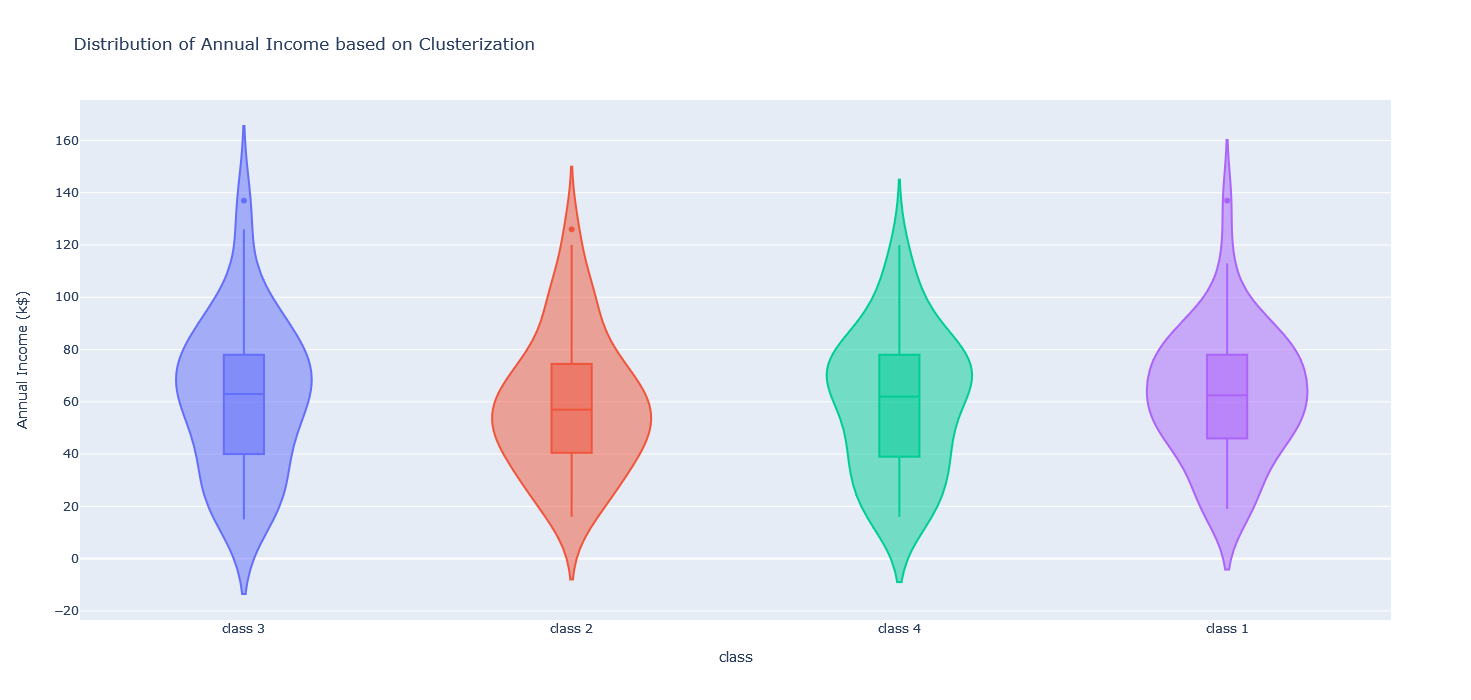

In [35]:
fig = px.violin(df_customers, y="Annual Income (k$)", x = 'class', box=True, 
                width = 900, height = 700, color = "class",
                title = 'Distribution of Annual Income based on Clusterization')
fig.update_layout(showlegend=False)
fig.show()

Observando o gráfico não é possível perceber uma diferença entre o annual income de cada classe.

C:\Users\Pichau\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Pichau\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<AxesSubplot:xlabel='class', ylabel='count'>

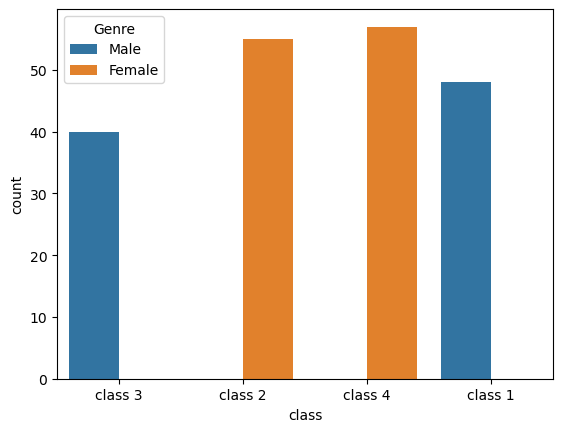

In [36]:
sns.countplot(data= df_customers, x = 'class', hue ='Genre')

Neste gráfico nota-se que as classes 4 e 1 são compostos por pessoas do sexo masculino enquanto as classes 3 e 2 são compostos pelas pessoas do sexo feminino.

# **Conclusion**

Na segmentação dos clientes foram identificados quatro grupos distintos de compradores, nos quais os principais a serem focados são os grupos 1 e 3, visto que os grupos em sí possuem annual income relativamente similar,mas estes dois grupos possuem valores de spending score menores que 60. 

Como esses dois grupos são formados por homens com idades na faixa de 40 à 60 anos, o ideal é identificar quais são os produtos mais comprados e mais desejados desses tipos de consumidores para elaborar estratégias de marketing focando neste público e em alguns casos concedendo descontos em compras com programas de fidelidade para tentar impulsionar o número de vendas.

Em relação ao produtos mais vendidos foi identificados os seguintes itens:
- mineral water, eggs, spaghetti, french fries, chocolate, green tea, milk, ground beef, frozen vegetagles, pancakes.

Destes itens, a sua maioria é composta por itens de consumo diário e por itens de breakfast.

Os top 10 itens menos comprados são:
- asparagus, water spray, napkins, cream, bramble, tea, mashed potato, chutney, chocolate bread,dessert wine.

Alguns destes itens são considerados itens de limpeza, de sobremesa e vegetais, porém não parece existir um padrão vísivel entre eles para que ocorre-se a sua baixa demanda. Como o dataset de produtos comprados é considerado relativamente pequeno não existe uma ocorrência significativa dos produtos menos comprados, como por exemplo 'asparagus' foi comprado somente 1 vez em 7500 compras, com isso não é possível realizar uma análise confiável visando aumentar o número de vendas desses produtos.

visando aumentar o número de vendas nota-se que das regras de associação criadas o produto 'mineral water' tem um grande impacto como item consequente tanto após compras com um ou dois itens, além de ser o produto mais vendido da loja. Analisando os itens com menor confiança entre as compras com dois itens o 'mineral water' é geralmente o primeiro item a ser comprado, indicando que quando a pessoa compra este item ela tende a não comprar outros itens como 'cereals', 'red wine' e 'avocado', que são itens de média demanda.

Com base nisto uma estratégia que pode ser implementada é alocar o produto 'mineral water' no fim dos corredores desta loja, onde nestes corredore podem se encontrar produtos como itens 'ground beef', 'spaghetti' e 'milk', que são itens que possuem uma confiança e suporte altos de antecessores do item de 'mineral water'. Isto também pode ocasionar no aumento de venda de outros itens, visto que 'mineral water' é o produto de maior demanda os consumidores podem acabar comprando outros produtos no meio do trajeto até este item.